In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mlflow'

In [21]:
data=pd.read_csv('../data/AdSmartABdata.csv')
data.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
6966,dd831cde-3295-42eb-b7f9-c37efe8dc44e,exposed,2020-07-09,21,MHA-L09,6,Chrome Mobile WebView,0,0
2053,433d1f9d-a3b3-4471-aa2b-f16d7e523ab6,exposed,2020-07-10,8,Samsung SM-G960F,6,Chrome Mobile WebView,0,0
5878,b9f39456-9864-4d61-a3b3-8e5c3aba5866,control,2020-07-09,12,Generic Smartphone,6,Chrome Mobile,0,1
5192,a50145c5-4842-4ec7-8e0f-edd478202957,exposed,2020-07-05,7,Pixel 4,6,Chrome Mobile WebView,0,1
5749,b5375994-2325-4393-89d5-2a6ec341d059,control,2020-07-10,6,Generic Smartphone,6,Chrome Mobile,0,0


In [22]:
platforms = data['platform_os'].unique()

In [23]:
browsers = data['browser'].unique()
browsers

array(['Chrome Mobile', 'Chrome Mobile WebView', 'Facebook',
       'Mobile Safari', 'Chrome Mobile iOS', 'Samsung Internet',
       'Mobile Safari UI/WKWebView', 'Chrome', 'Opera Mini',
       'Edge Mobile', 'Android', 'Pinterest', 'Opera Mobile',
       'Firefox Mobile', 'Puffin'], dtype=object)

In [24]:
data['clicked'] = data['yes']+data['no']
data = data[data['clicked'] == 1]

In [25]:
chrome = data
chrome.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
1845,3d126856-74a9-4921-8ae8-2350705b7db5,control,2020-07-03,15,Samsung SM-A715F,6,Facebook,1,0,1
6269,c774d3d8-a33a-478b-9a1e-7c770d02fe8f,exposed,2020-07-10,9,Generic Smartphone,6,Facebook,1,0,1
5278,a73ec6ae-0524-459a-bdf8-5ab9f04c213c,control,2020-07-09,9,iPhone,5,Mobile Safari,1,0,1
1492,30f2696e-5351-41dd-b2c6-4429b8d256d6,exposed,2020-07-09,6,Generic Smartphone,6,Chrome Mobile,0,1,1
3237,6879270b-186f-4af8-af37-9828a54db8e3,exposed,2020-07-03,12,Generic Smartphone,6,Chrome Mobile,0,1,1


In [26]:
os6 = data[data['platform_os'] == 6]
os6.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
4637,93d7d285-71d3-4bd8-bc83-4def8b69b9af,exposed,2020-07-06,4,Generic Smartphone,6,Chrome Mobile,0,1,1
7293,e7974d58-12d7-4ba5-967a-35ecbd6a2e92,exposed,2020-07-06,5,Generic Smartphone,6,Chrome Mobile,0,1,1
5648,b29c06cf-1ce5-4ae6-943b-4885886779e7,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0,1
2256,49e7690d-4825-499c-9553-756af3198a10,control,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,1,0,1
2771,594ecca2-51fe-4e43-9bcb-38ba4790a2b1,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1


In [27]:
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    d = df[[x_col]].groupby(x_col).agg({x_col:'count'}).rename(columns = {x_col : 'count'}).reset_index()
    d = d.sort_values(by="count", ascending=False)
    plt.figure(figsize=(12, 7))
    sns.barplot(data = d, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

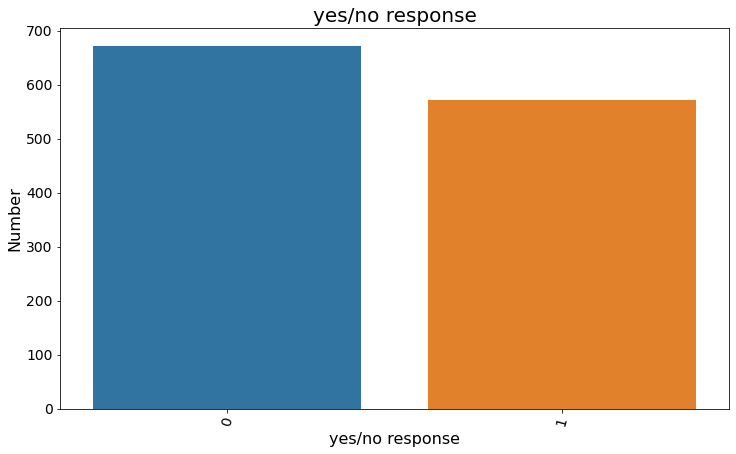

In [28]:
plot_bar(chrome, 'yes', 'count', 'yes/no response', 'yes/no response', 'Number')

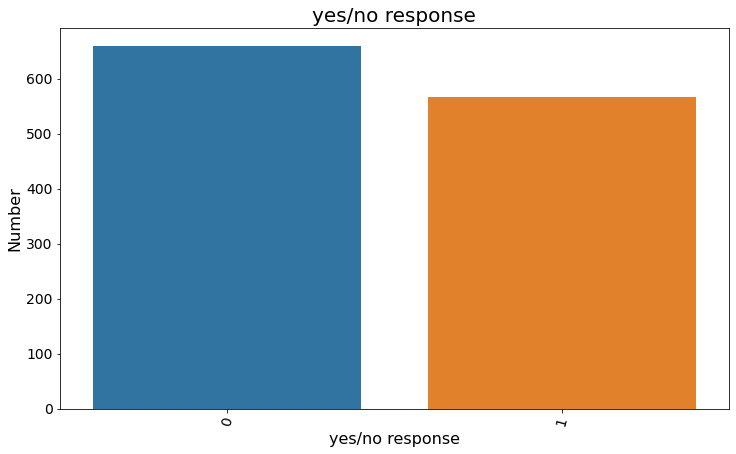

In [29]:
plot_bar(os6, 'yes', 'count', 'yes/no response', 'yes/no response', 'Number')

In [30]:
chrome.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1


In [31]:

chrome_data = chrome[['experiment','date', 'hour', 'device_make', 'platform_os', 'yes']]

In [32]:
chrome.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
clicked        0
dtype: int64

In [33]:
x = chrome_data[['experiment','date', 'hour', 'device_make', 'platform_os']]
y = chrome_data[['yes']].values
x.shape, y.shape

((1243, 5), (1243, 1))

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x['experiment'] = le.fit_transform(x['experiment'])
x['device_make'] = le.fit_transform(x['device_make'])
x['date'] = le.fit_transform(x['date'])
x.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,experiment,date,hour,device_make,platform_os
2,1,2,2,4,6
16,1,1,16,13,6
20,1,3,8,13,6
23,0,5,4,43,6
27,0,0,15,13,6


### Scaling and Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

### Train Test split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=25)

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5180722891566265

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

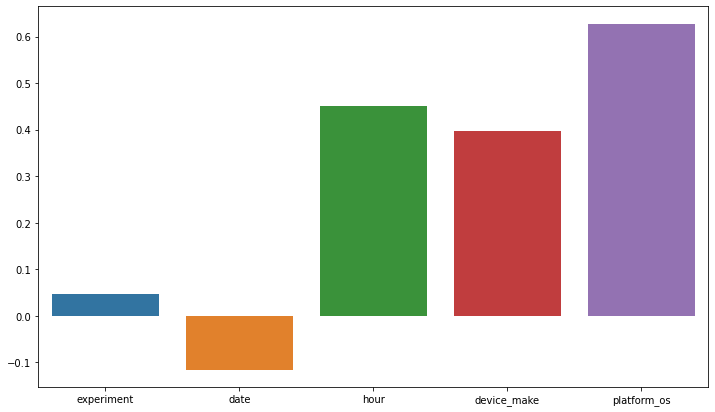

In [38]:
plt.figure(figsize=(12,7))
sns.barplot(x.columns, reg.coef_[0])

### Decision Trees

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)

0.8390804597701149

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

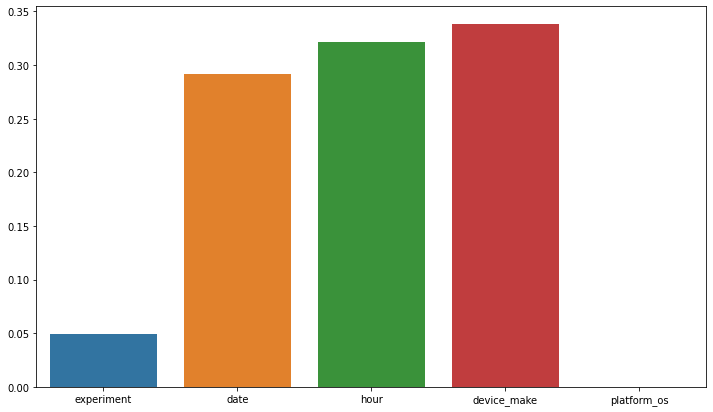

In [41]:
plt.figure(figsize=(12,7))
sns.barplot(x.columns, dtree.feature_importances_)

### XGBoost Classifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5180722891566265

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

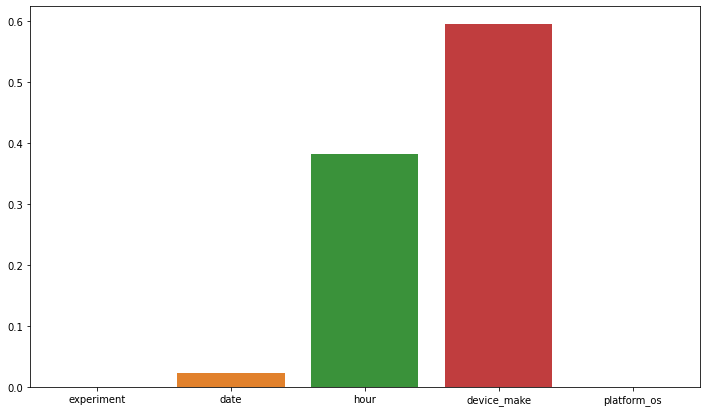

In [43]:
plt.figure(figsize=(12,7))
sns.barplot(x.columns, clf.feature_importances_)

In [44]:
from sklearn.model_selection import KFold

### Logistic Kfold

In [45]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LogisticRegression().fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    print("score:", score)
    #log model params
    mlflow.log_param("score", score)

    # log model
    mlflow.sklearn.log_model(reg, "logistic_regression_models")

0.5341365461847389
0.5020080321285141
0.5060240963855421
0.49193548387096775
0.5685483870967742


### Decision Tree KFold

In [47]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    print("score:",dtree.score(X_test, y_test))

score: 0.5381526104417671
score: 0.4979919678714859
score: 0.5100401606425703
score: 0.4959677419354839
score: 0.5725806451612904


### XGBoost KFold

In [48]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    print(dtree.score(X_test, y_test))
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
    clf.score(X_test, y_test)

0.5261044176706827
0.4979919678714859
0.5100401606425703


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.49193548387096775
0.5685483870967742


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
